<a href="https://colab.research.google.com/github/luigiselmi/dl_tensorflow/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision
We have already seen the application of fully connected neural networks to the MNIST digits images classification task. In this notebook we use convolutional neural networks for the same task that provides several advantages over the fully connected layers. In Colab you may want to switch the Runtime to "T4 GPU" to save time during the training of the model.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time

## The MNIST digits classification task
We use the functional syntax to build our convolutional model. We use three convolutional layers, followed by a max pooling layer, then a flatten layer, that is a fully connected layer of one dimension with the same number of units as the size of the last convolutional layer. The flatten layer is used to reduce the output to one dimension. Finally we have a fully connected layer with a softmax activation function to provide the probability for each digit. As we can see from the model summary, the size of the model's features, i.e. width and heigh, shrinks while the number of channels, or feature maps, increases. The shape of the inputs is Height x Width x Channel, in the MNIST case 28 x 28 x 1.  

![ConvNet](https://github.com/luigiselmi/dl_tensorflow/blob/main/images/mnist_cnn.jpg?raw=1)

In [2]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

We reuse most of the code used for the MNIST digits classification in the notebook [Machine Learning Fundamentals](ml_fundamentals.ipynb) with the fully connected layers.

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

11490434/11490434 [==============================] - 0s 0us/step


We compile and fit the CNN model  

In [4]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 8s 4ms/step - loss: 0.1609 - accuracy: 0.9501
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0453 - accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0306 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0176 - accuracy: 0.9947


We perform an evaluation of the model's performances on the test set. We can see the our network with only three convolutional layers achieves a better performance than the fully connected model.

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0270 - accuracy: 0.9913
Test accuracy: 0.991


## The convolution operation
The difference between a dense layer and a convolutional layer is that a dense (fully connected) layer learns global patterns in an image, while a convolutional layer learns local patterns within small 2D windows that do not depend on their location in the image. In our convolutional layers we have used a window of size 3x3 pixels (kernel size). The advantages of using convolutional layers is that they learn patterns that are

* translational invariant
* hierarchically organized

An object can be learnt by the convolutional layer as made up of simpler objects such as circles and lines, wherever they appear in the same configuration. A convolutional layer is defined by its

* window (or kernel) size
* number of filters (or channels / feature maps)

The number of parameters to be learnt by a convolutional layer depends on the kernel size, the number of filters, and the way the kernel is moved over the input, that is the padding and the stride. Padding is used to add one or more rows and columns to the borders of the 2D input in order to have an output of the same size of the input. Stride is used to reduce the size of the output.

## The max-pooling operation
After a convolutional layer a max-pooling layer is used to halve the size of feature maps. There are no learning parameters for this type of layer sine it is a simple operation for which the maximum value of a 2x2 kernel with stride 2 is used to build the output. The main effect of max-pooling is to reduce the number of feature maps and therefore the number of parameters to learn.

## Number of learnable parameters of each convolutional layer
The number of parameters $p_l$ to learn by each convolutional layer $l$ is given by the product of the number of feauture maps of the previous layer $f_{l-1}$ (max-pooling) times the kernel size (eg. 3 x 3 = 9) times the number of output feature maps $f_l$ of the convolutional layer plus again the number of feature maps $f_l$:

$$p_l = f_{l-1} × k_l × k_l × f_l + f_l  $$

For instance, the number of parameters of the 2nd convolutional layer is

$$p_2 = f_1 × 3 × 3 × f_2 + f_2 = 32 × 3 × 3 \times 64 + 64 = 18496$$

The number of parameters of the 3rd convolutional layer is

$$p_3 = f_2 × 3 × 3 × f_3 + f_3 = 64 × 3 × 3 \times 128 + 128 = 73856$$

## Training a ConvNet on a small dataset
We train a convolutional neural network model (CNN) for an image classification task. The images are about dogs and cats. We download the data from Kaggle. In order to use the Kaggle APIs we need to import a token previously downloaded after we login into the Kaggle web site.

In [11]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lselmi","key":"c8a6ca5d3e0efc3c981490a3cbb4bb98"}'}

In [12]:
mkdir /root/.kaggle

We move the file with the token to the /root/.kaggle/ folder

In [13]:
mv kaggle.json /root/.kaggle/

We call the Kaggle APIs to download the dataset

In [14]:
!kaggle competitions download -c dogs-vs-cats

 99% 803M/812M [00:09<00:00, 46.7MB/s]
100% 812M/812M [00:09<00:00, 87.0MB/s]


We uncompress the data

In [15]:
!unzip -qq /content/dogs-vs-cats.zip

In [16]:
!unzip -qq /content/train.zip

The train dataset contains 12500 images of dogs and 12500 of cats

In [17]:
!find /content/train/ -type f | grep cat |wc -l

12500


In [18]:
!find /content/train/ -type f | grep dog |wc -l

12500


In [28]:
from PIL import Image
img_cat = Image.open('/content/train/cat.0.jpg')
img_cat.size

(500, 374)

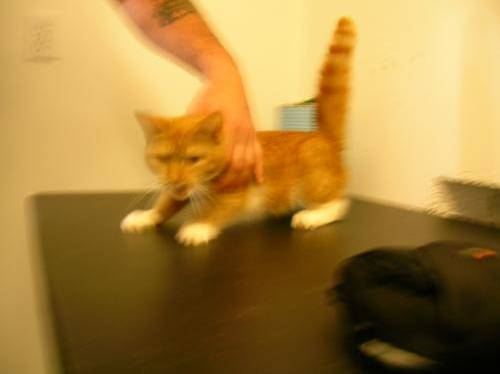

In [29]:
img_cat

In [30]:
img_dog = Image.open('/content/train/dog.0.jpg')
img_dog.size

(499, 375)

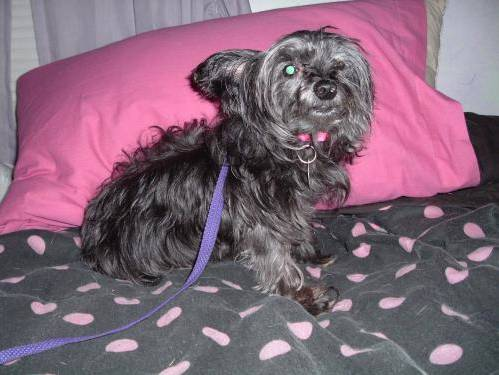

In [31]:
img_dog

We will use only 1000 images of dogs and 1000 images of cats for training, 500 images of each class for validation, and 1000 images of each class for testing.  

In [19]:
import os, shutil, pathlib
original_dir = pathlib.Path("/content/train/")
new_base_dir = pathlib.Path("/content/cats_vs_dogs_small")

In [20]:
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg"
            for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

In [21]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

For this task we use a model with 5 convolutional layers. Since we are dealing with a binary classification task, the output layer contains only one unit with a sigmoid activation function. We rescale the value of the image pixels from a [0, 255] range to a [0, 1] range. As we can see from the model summary, the size of each feature map goes from 180x180 of the initial 3 RGB channes, to 7x7 of the last layer, while the number of feature maps (filters) goes from the three RGB channels of the input layer to 256 of the last convolutional layer.

In [35]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [36]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

## Data preprocessing
As we have seen the images have different size that we have to resize to the height and width of the input layer, e.g. 180x180. We have also to transform the values to floating-point numbers

* Convert the images into floating-point tensors
* Resize them to a shared size (e.g. 180 × 180)
* Pack them into batches (e.g. batches of 32 images)

We create three datasets from the files, using an utility function provided by Keras, for training, validation and test. A dataset is an iterator that can be used to:

* loop the images
* create batches
* shuffle the images
* apply transformations to the images



In [24]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(new_base_dir / "train", image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / "validation", image_size=(180, 180), batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / "test", image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


Each dataset contains batches of tensors created by loading the data in the images after they have been resized.

In [38]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


We set the callbacks for the model's fit(.) function to save the best model during the training and the validation

In [39]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras", save_best_only=True, monitor="val_loss")]

We can finally fit(.) the model to the data

In [40]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 10s 85ms/step - loss: 0.7229 - accuracy: 0.5185 - val_loss: 0.6919 - val_accuracy: 0.5030
Epoch 2/30
63/63 [==============================] - 5s 84ms/step - loss: 0.6938 - accuracy: 0.5210 - val_loss: 0.6895 - val_accuracy: 0.5830
Epoch 3/30
63/63 [==============================] - 6s 91ms/step - loss: 0.6827 - accuracy: 0.5685 - val_loss: 0.6694 - val_accuracy: 0.5790
Epoch 4/30
63/63 [==============================] - 4s 60ms/step - loss: 0.6542 - accuracy: 0.6215 - val_loss: 0.6353 - val_accuracy: 0.6330
Epoch 5/30
63/63 [==============================] - 4s 58ms/step - loss: 0.6160 - accuracy: 0.6620 - val_loss: 0.5922 - val_accuracy: 0.6870
Epoch 6/30
63/63 [==============================] - 6s 99ms/step - loss: 0.5698 - accuracy: 0.6950 - val_loss: 0.5580 - val_accuracy: 0.7000
Epoch 7/30
63/63 [==============================] - 5s 76ms/step - loss: 0.5521 - accuracy: 0.7210 - val_loss: 0.6147 - val_accuracy: 0.6670
Epoch 8/30
6

We plot the evaluation performances: accuracy and loss on the training and validation datasets. The plots show a clear sign of overfitting: the training accuracy achieves almost 100% while the validation accuracy stalls at around 70%.

In [49]:
def plot_results(history):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, "bo", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()

In [ ]:
plot_results(history)

We use the model with the test set to see its performances against unseen data

In [42]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 5s 64ms/step - loss: 0.5543 - accuracy: 0.7350
Test accuracy: 0.735


## Data augmentation
In case of small dataset the chance of overfitting even a small network is high because is easy to fit the model to the training data by simply running more epochs but the model will not be able to generalize to unseen images. Data augmentation is a technique to create more images by applying linear transformations, such as flip, rotation, zoom, to the original images. In Keras we can apply several transformation in a sequence

In [43]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

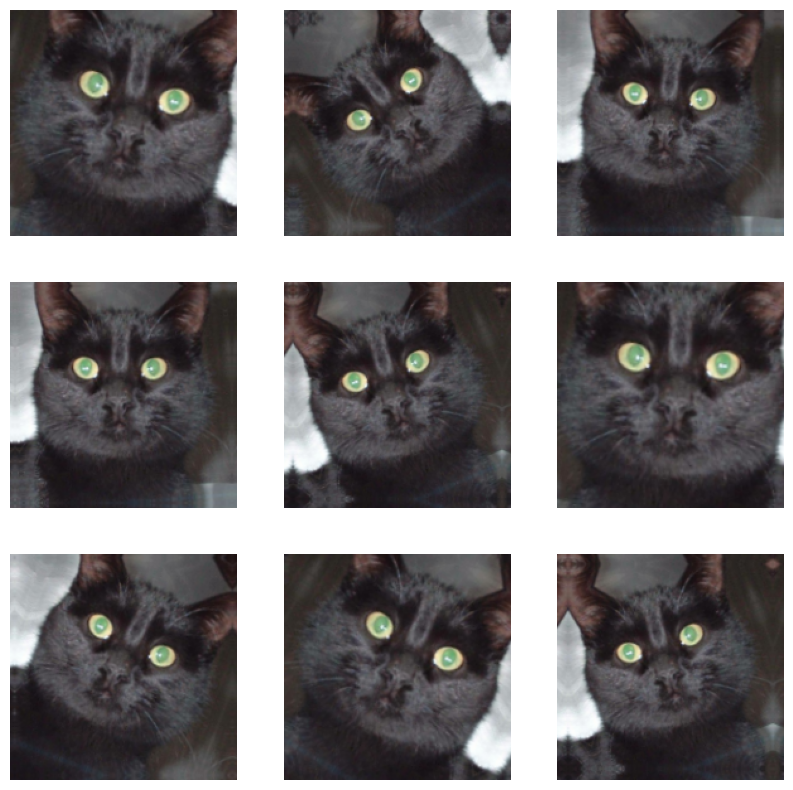

In [44]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

The additional data still comes from the same set of images so we use also the dropout regularization to reduce the parameters of the last fully connected layer

In [45]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 87, 87, 64)        18496     
                                                           

We use the callbacks to stop the training when there is no improvement on the validation set and to save the model.

In [47]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch_with_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
]

We train th emodel for three times more epochs than before to see where we will get overfitting with the augmented data and the dropout

In [48]:
history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 8s 64ms/step - loss: 0.6967 - accuracy: 0.5115 - val_loss: 0.6929 - val_accuracy: 0.5230
Epoch 2/100
63/63 [==============================] - 7s 103ms/step - loss: 0.6931 - accuracy: 0.5165 - val_loss: 0.6909 - val_accuracy: 0.5100
Epoch 3/100
63/63 [==============================] - 4s 62ms/step - loss: 0.6940 - accuracy: 0.5145 - val_loss: 0.6904 - val_accuracy: 0.5030
Epoch 4/100
63/63 [==============================] - 6s 97ms/step - loss: 0.6808 - accuracy: 0.5875 - val_loss: 0.6666 - val_accuracy: 0.5820
Epoch 5/100
63/63 [==============================] - 6s 83ms/step - loss: 0.6587 - accuracy: 0.6145 - val_loss: 0.6843 - val_accuracy: 0.5830
Epoch 6/100
63/63 [==============================] - 4s 60ms/step - loss: 0.6513 - accuracy: 0.6345 - val_loss: 0.6393 - val_accuracy: 0.6160
Epoch 7/100
63/63 [==============================] - 5s 73ms/step - loss: 0.6288 - accuracy: 0.6495 - val_loss: 0.6283 - val_accuracy: 0.6230
Epoch

We plot the results for accuracy and loss on the training and validation datasets. We can see that overfitting happens later after 20 epochs

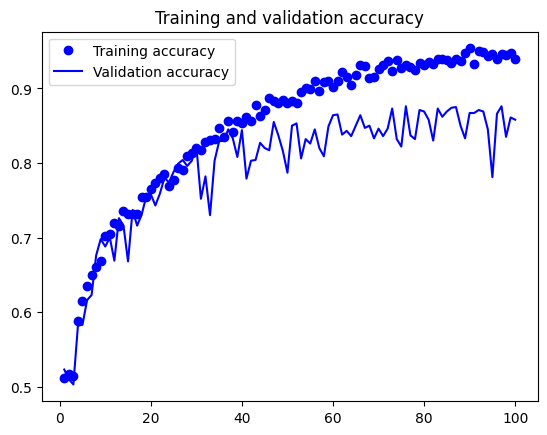

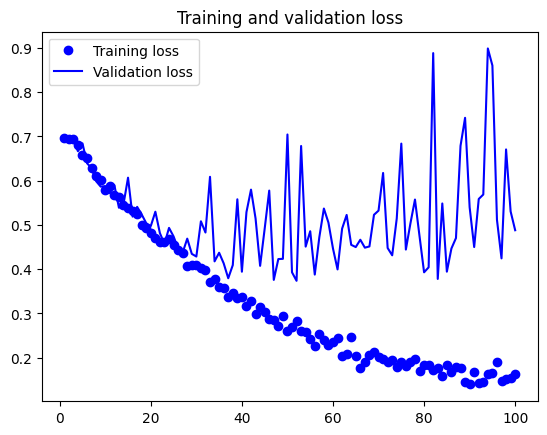

In [50]:
plot_results(history)

The accuracy on the test set is also improved from 73.5% to 84.5%

In [51]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 48ms/step - loss: 0.4596 - accuracy: 0.8455
Test accuracy: 0.845


## Pretrained model
A model trained on a large dataset can be used on a different dataset whose feautures are among those learnt on the larger one. A classical dataset to pretrain a model is ImageNet. This dataset contains, among many ohers, also images of dogs and cats, so we can expect to get a much better model if we can re-use the model with the already learnt parameters. We will see two ways of using a pretrained model: feature extraction and fine tuning  

### Feature extraction
This technque is based on using the convolutional layers of a deep neural network pretrained on a large dataset, that is its convolutional base, without the last fully connected layers. The convolutional layer with some new fully connected layers, randomly initialized, is then trained on the dataset collected for the task at hand. The reason for this technique is that the convolutional layers have learnt more abstract features that may be part of objects commonly found in images. One more reason for task where the location of objects matters is that fully connected layers do not contain information about objects' location. Many pretrained models are availble from Keras such as VGG and ResNet. For our example we will use VGG16 pretrained on ImageNet. With the include_top argument set to false we select a model without the fully connected classifier.

In [52]:
conv_base = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


We can have a look at the structure of our convolutional base

In [54]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

### Fast feature extraction without data augmentation
We can see that the output of the convolutional base is a 5x5x512 tensor. We want to use this output to train our final layer on our dataset. There are two ways to achieve this: one is to use the output of the convolutional base on our dataset and then train a small network of fully connected layers to implement the classifier. We save the features maps and the lable in two lists for the train, validation and test set. With this technique we do not use augmentation. The technique is fast, cheap to compute, and **can be performed without a GPU**.

In [55]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [56]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 21ms/step


In [57]:
train_features.shape

(2000, 5, 5, 512)

Now we define the classifier

In [58]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 5, 5, 512)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 12800)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               3277056   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3277313 (12.50 MB)
Trainable params: 3277313 (12.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We compile the classifier model and create the callbacks for the fit() function

In [59]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction.keras",
    save_best_only=True,
    monitor="val_loss")
]

Finally we fit the classifier model trained on the feature maps computed using the convolutional base

In [60]:
history = model.fit(train_features, train_labels, epochs=20, validation_data=(val_features, val_labels), callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 10ms/step - loss: 18.2884 - accuracy: 0.9175 - val_loss: 5.4161 - val_accuracy: 0.9680
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 3.8641 - accuracy: 0.9750 - val_loss: 10.8295 - val_accuracy: 0.9440
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 2.5766 - accuracy: 0.9840 - val_loss: 4.6874 - val_accuracy: 0.9740
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1928 - accuracy: 0.9905 - val_loss: 4.2308 - val_accuracy: 0.9770
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8482 - accuracy: 0.9935 - val_loss: 22.1313 - val_accuracy: 0.9200
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8429 - accuracy: 0.9930 - val_loss: 5.0913 - val_accuracy: 0.9760
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.2813 - accuracy: 0.9985 - val_loss: 4.7184 - val_accuracy: 0.9720
Epoch 8/20
63/63

We can see that the validation accuracy is 97%, better than with the non pretrained network. We can also however that we are overfitting since the beginning. This is because the dataset is small and we are not using data augmentation.

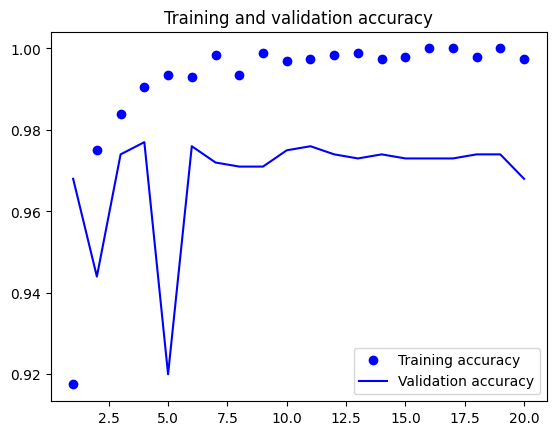

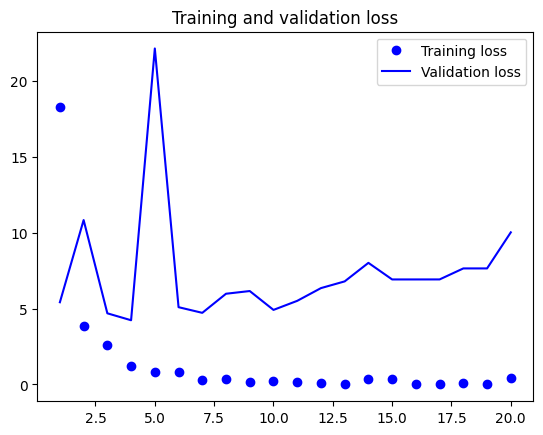

In [61]:
plot_results(history)

### Feature extraction with data augmentation
Now we change the technique to use the data augmentaion. Our goal now is to chain the pretrained convolutional base with a fully connected layer and train this model with our augmented dataset. We first freeze the convolutional base so its weights will not be destroyed during the training.

In [6]:
conv_base = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False)

In [7]:
conv_base.trainable = True
print("This is the number of trainable weights ""before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [8]:
conv_base.trainable = False
print("This is the number of trainable weights ""after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


Now we can build the model chaining the freezed convoultional base and our fully connected classifier. We define also the transformations for the data augmentation step.

In [9]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

In [10]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem (  (None, 180, 180, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 180, 180, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 12800)             0     

In [22]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
10/63 [===>..........................] - ETA: 12:42 - loss: 76.8615 - accuracy: 0.7469

In [ ]:
plot_results(history)